<a href="https://colab.research.google.com/github/ShamsaAwaan/AI-and-Machine-Learning/blob/main/cat_vs_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# importing the zipfile module
data_link = '/content/drive/MyDrive/cats vs. Dogs/archive.zip'
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile(data_link, 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path='/content/drive/MyDrive/cats vs. Dogs')

KeyboardInterrupt: 

In [52]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
tf.device('/device:GPU:0')

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img
import os

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# tf.debugging.set_log_device_placement(True)

In [ ]:
# import the modules
# path=('/content/drive/MyDrive/cats vs. Dogs/Animal Images')
path = '/content/drive/MyDrive/cats vs. Dogs/Animal Images'
import os
from os import listdir
labels = []
image_path = []

data = os.listdir(path)
for class_name in data:
	class_path = os.path.join(path, class_name)
	for image_name in os.listdir(class_path):
		if class_name == 'cats':
			labels.append(0)
		else :
			labels.append(1)
		image_path.append(os.path.join(class_path, image_name))








In [ ]:
len(labels)

In [ ]:
df = pd.DataFrame()
df['images'] = image_path
df['labels'] = labels
df = df.sample(frac=1).reset_index(drop = True)
df.head()

,images,labels
0,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0
1,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0
2,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0
3,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0
4,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0


In [ ]:
df['images'][0]

'/content/drive/MyDrive/cats vs. Dogs/Animal Images/cats/2012-10-05_295020317995969976.jpg'

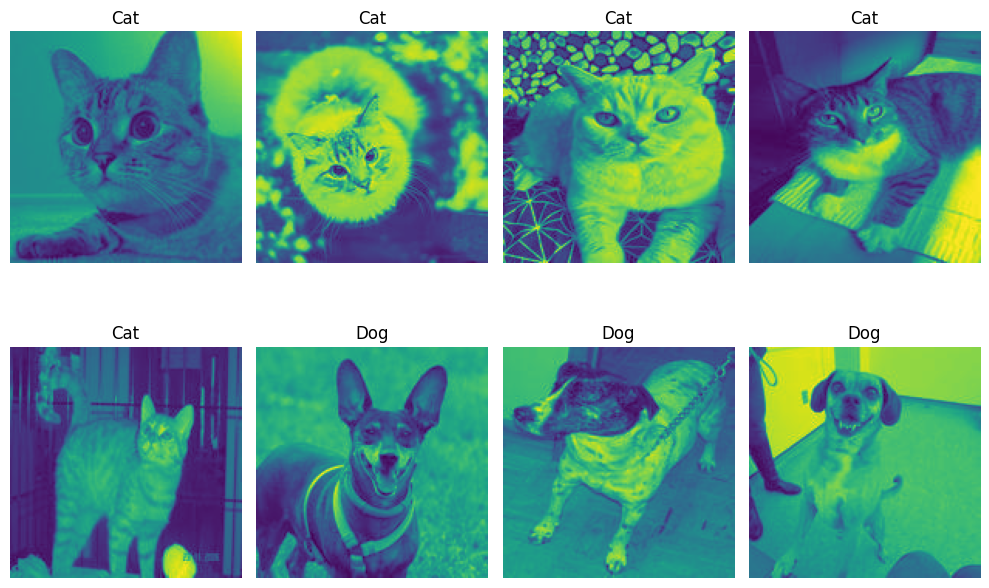

In [ ]:
plt.figure(figsize=(10, 7))  # Adjust figure size for better layout

for i, image_path in enumerate(df['images'][:8]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(plt.imread(image_path))
    plt.axis('off')

    if df['labels'][i] == 0:
        plt.title('Cat')
    else:
        plt.title('Dog')

plt.tight_layout()
plt.show()


In [ ]:

df.head()


In [ ]:
df['labels'] = df['labels'].astype('str')


### data to csv

In [ ]:
# df.to_csv('/content/drive/MyDrive/cats vs. Dogs/data.csv', index=False)

In [ ]:
train,test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train

,images,labels
27565,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0
24602,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,1
1640,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0
13506,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0
12296,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,1
...,...,...
29802,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0
5390,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,1
860,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,1
15795,/content/drive/MyDrive/cats vs. Dogs/Animal Im...,0


In [ ]:
df.labels.dtype

dtype('O')

In [ ]:
# Image Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='',
    x_col='images',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64,
    shuffle=True)

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='',
    x_col='images',
    y_col='labels',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64,
    shuffle=True)

Found 24048 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="images". These filename(s) will be ignored.
  warnings.warn(


Found 6013 validated image filenames belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3),padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 31, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,741,441 (6.64 MB)

 Trainable params: 1,740,993 (6.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# torch.cuda.empty_cache()
# torch.device('cuda' if torch.cuda.is_available() else "cpu")
torch.device('cuda')
model.fit(train_generator, epochs=25, batch_size=64,
                      validation_data=test_generator,callbacks = [early_stopping])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 126s 307ms/step - accuracy: 0.5477 - loss: 0.8083 - val_accuracy: 0.5812 - val_loss: 0.6870
Epoch 2/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 102s 272ms/step - accuracy: 0.7061 - loss: 0.5692 - val_accuracy: 0.6664 - val_loss: 0.5910
Epoch 3/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 100s 267ms/step - accuracy: 0.7672 - loss: 0.4809 - val_accuracy: 0.7259 - val_loss: 0.5421
Epoch 4/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 99s 263ms/step - accuracy: 0.8076 - loss: 0.4164 - val_accuracy: 0.7643 - val_loss: 0.4927
Epoch 5/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 100s 267ms/step - accuracy: 0.8443 - loss: 0.3486 - val_accuracy: 0.7723 - val_loss: 0.4906
Epoch 6/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 98s 260ms/step - accuracy: 0.8921 - loss: 0.2526 - val_accuracy: 0.7184 - val_loss: 0.5443
Epoch 7/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 100s 265ms/step - accuracy: 0.9282 - loss: 0.1750 - val_accuracy: 0.7743 - val_loss: 0.5824
Epoch 8/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 99s 262ms/step - accuracy: 0.9517 - lo

In [ ]:
model.save('/content/drive/MyDrive/cats vs. Dogs/cats_vs_dogs_model.keras')

In [54]:
model= tf.keras.models.load_model('/content/drive/MyDrive/cats vs. Dogs/cats_vs_dogs_model.keras')

In [ ]:

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.7707 - loss: 0.4833
Test Loss: 0.4906379282474518
Test Accuracy: 0.772326648235321


please enter the image path/content/drive/MyDrive/cats vs. Dogs/Animal Images/cats/00001098_028.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step


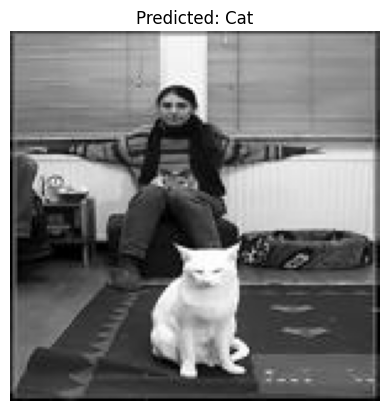

The image is predicted to be a: Cat


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    # Prediction
    prediction = model.predict(x)
    predicted_class = "Dog" if prediction[0][0] > 0.5 else "Cat"

    # Display the image with prediction
    plt.imshow(image.load_img(image_path))  # Original size image
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

    return predicted_class

# Example usage
image_path = input("please enter the image path")
predicted_class = predict_image(image_path, model)
print(f"The image is predicted to be a: {predicted_class}")
